# Overview

Practice regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
sns.set()
from statsmodels.formula import api as smf
%matplotlib notebook

### Import Data

In [3]:
dataset = pd.read_csv('..\datasets\HappinessAlcoholConsumption.csv')
dataset.head(6)

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
5,Canada,North America,north,7.404,922,42.349,240,122,100


### Explore and transform

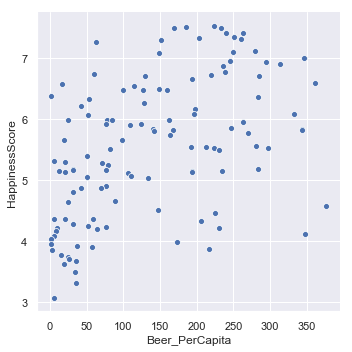

In [4]:
sns.relplot(x='Beer_PerCapita', y='HappinessScore', data=dataset)

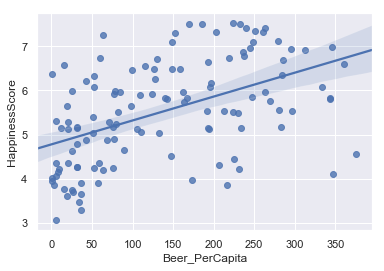

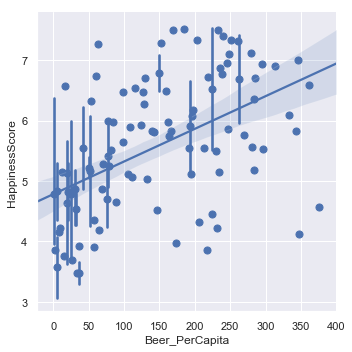

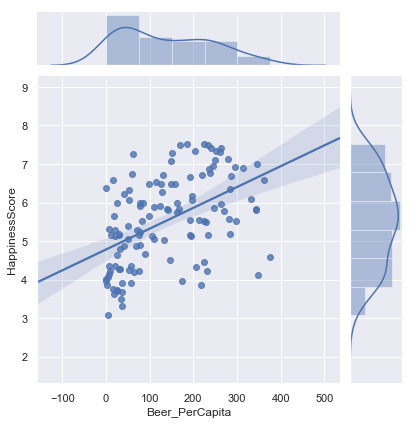

In [5]:
sns.regplot(x='Beer_PerCapita', y='HappinessScore', data=dataset)
sns.lmplot(x='Beer_PerCapita', y='HappinessScore', data=dataset, x_estimator=np.mean)
sns.jointplot(x='Beer_PerCapita', y='HappinessScore', data=dataset, kind='reg')

### Build model

In [6]:
dataset['Beer_PerCapita'].corr(dataset['HappinessScore'])

0.49336720477895335

In [7]:
dataset.corr()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.815163,-0.451425,0.493367,0.256399,0.450589
HDI,0.815163,1.000000,-0.573734,0.588394,0.393413,0.602561
GDP_PerCapita,-0.451425,-0.573734,1.000000,-0.369936,-0.260818,-0.200154
Beer_PerCapita,0.493367,0.588394,-0.369936,1.000000,0.364855,0.474274
Spirit_PerCapita,0.256399,0.393413,-0.260818,0.364855,1.000000,0.118718
Wine_PerCapita,0.450589,0.602561,-0.200154,0.474274,0.118718,1.000000


In [25]:
X_train, X_test, y_train, y_test = train_test_split(dataset['Beer_PerCapita'], dataset['HappinessScore'], test_size=0.25, random_state=1)

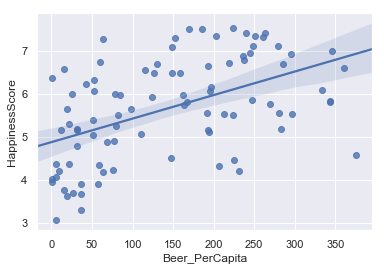

In [26]:
sns.regplot(x='Beer_PerCapita', y='HappinessScore', data=pd.concat([X_train, y_train], axis=1))

In [38]:
pd.DataFrame(X_train).values

array([[ 25],
       [ 76],
       [270],
       [343],
       [162],
       [297],
       [ 98],
       [ 63],
       [ 37],
       [  1],
       [ 51],
       [333],
       [238],
       [  5],
       [115],
       [ 42],
       [163],
       [196],
       [ 31],
       [147],
       [ 21],
       [ 52],
       [281],
       [ 51],
       [376],
       [285],
       [ 53],
       [ 15],
       [ 36],
       [263],
       [231],
       [245],
       [ 64],
       [ 78],
       [167],
       [ 16],
       [ 85],
       [193],
       [206],
       [ 26],
       [  6],
       [247],
       [219],
       [ 79],
       [169],
       [  1],
       [127],
       [ 19],
       [124],
       [225],
       [261],
       [111],
       [192],
       [224],
       [ 57],
       [ 19],
       [130],
       [213],
       [224],
       [203],
       [ 36],
       [149],
       [ 69],
       [ 58],
       [ 32],
       [ 21],
       [  5],
       [346],
       [159],
       [149],
       [279],
      

In [47]:
reg = linear_model.LinearRegression()
X_train_values = pd.DataFrame(X_train).values
reg.fit(X_train_values, y_train)
r_2 = reg.score(X_train_values, y_train)
coef = reg.coef_
intercept = reg.intercept_

In [55]:
print(f'\
R^2: {r_2}\n\
Coefficient: {coef}\n\
Intercept: {intercept}')

R^2: 0.24912492105103456
Coefficient: [0.00546667]
Intercept: 4.8790462322793315


In [57]:
y_pred = reg.predict(pd.DataFrame(X_test).values)

In [59]:
y_pred

array([5.47491284, 6.06531278, 5.29451286, 6.77597938, 6.31677942,
       5.42024618, 4.91184623, 5.29997952, 5.04851288, 5.60611283,
       4.89544623, 6.43157941, 5.16331287, 5.01571289, 4.92277956,
       5.06491288, 6.15277944, 5.01571289, 5.82477947, 5.64437949,
       6.13637944, 4.98837955, 5.45851284, 6.59011273, 5.10864621,
       5.65531282, 5.5787795 , 5.26717953, 5.36557952, 5.05397955,
       6.1582461 ])

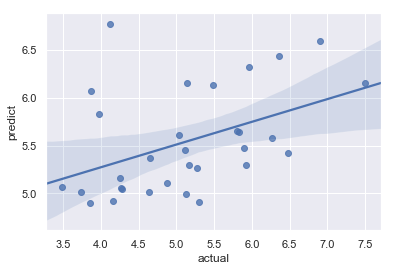

In [65]:
rslt_out_df = pd.DataFrame(list(zip(y_test.values,  y_pred)), columns=['actual', 'predict'])
sns.regplot(x='actual', y='predict', data=rslt_out_df)

In [69]:
from numpy import mean, sqrt, square
diff = rslt_out_df['predict'] - rslt_out_df['actual']
diff_rms = sqrt(mean(square(diff)))
print(f'RMS on difference: {diff_rms}')

RMS on difference: 0.9869071715325699
